# Heart Attack Project

## Imports

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data

In [202]:
df = pd.read_csv("heart.csv")

print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Output Histogram

<Axes: >

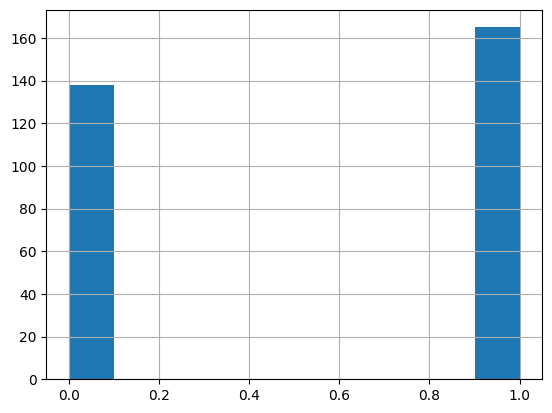

In [203]:
df["output"].hist()

## Separating Data

In [204]:
print(df.columns)

x_data = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]]
y_data = df["output"]

y_data.value_counts()

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


output
1    165
0    138
Name: count, dtype: int64

## Normalizing Data

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x_data)
x_data = scaler.transform(x_data.astype(float))

x_data[0]

array([ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
        1.09, -2.27, -0.71, -2.15])

## Selecting Train & Test Data

In [206]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

print(f"Train Data: x: {x_train.shape}, y: {y_train.shape}")
print(f"Test Data: x: {x_test.shape}, y: {y_test.shape}")

Train Data: x: (242, 13), y: (242,)
Test Data: x: (61, 13), y: (61,)


## K-Nearest Neighbor Classifying (KNN Classifying)

In [207]:
from sklearn.neighbors import KNeighborsClassifier

k = 37

neighbors = KNeighborsClassifier(k).fit(x_train, y_train)
predicted_y = neighbors.predict(x_test)

print(y_test[0:5])
print(predicted_y[0:5])

113    1
249    0
18     1
142    1
299    0
Name: output, dtype: int64
[1 0 1 1 1]


## KNN Evaluation

### Jaccard

In [208]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, predicted_y)

0.8333333333333334

### Accuracy Score

In [209]:
from sklearn.metrics import accuracy_score

predicted_y_train = neighbors.predict(x_train)
predicted_y_test = neighbors.predict(x_test)

print(f"Train Data Accuracy: {accuracy_score(y_train, predicted_y_train)}")
print(f"Test Data Accuracy: {accuracy_score(y_test, predicted_y_test)}")

Train Data Accuracy: 0.8181818181818182
Test Data Accuracy: 0.8852459016393442


## Calculating The Best K

In [210]:
max_k = 40

mean_accuracies = np.zeros(max_k - 1)

for k in range(1, max_k):
    neighbors = KNeighborsClassifier(k).fit(x_train, y_train)
    predicted_y = neighbors.predict(x_test)

    mean_accuracies[k - 1] = accuracy_score(y_test, predicted_y)

print(f"The best accuracy is \"{max(mean_accuracies)}\" with \"k = {mean_accuracies.argmax() + 1}\" ")

The best accuracy is "0.8852459016393442" with "k = 37" 


## Predicting a Data with KNN

In [211]:
# age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall
new_record = np.array([[55, 1, 0, 140, 217, 0, 1, 111, 1, 5.6, 0, 0, 3]]).reshape(1, -1)

normalized_record = scaler.transform(new_record.astype(float))

neighbors.predict(normalized_record)[0]


/Users/mac/Documents/programming/Machine-Learning/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int64(0)

<hr>

## Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=0.1, solver="liblinear")
reg.fit(x_train, y_train)

predicted_y = reg.predict(x_test)

print(f"Actual Data: {y_test.to_numpy()[0:5]}")
print(f"Predicted Data: {predicted_y[0:5]}")

predicted_y_probability = reg.predict_proba(x_test)
print(f"Predicted Probabilities: {predicted_y_probability.ravel()[0:5]}")

Actual Data: [1 0 1 1 0]
Predicted Data: [1 0 1 1 1]
Predicted Probabilities: [0.29 0.71 0.9  0.1  0.4 ]


## Logistic Regression Evaluation

### Jaccard

In [213]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, predicted_y)

0.825

### Classification Report

In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61



### Confusion Matrix

In [215]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

### Computing Confusion Matrix

Confusion matrix, without normalization
[[33  3]
 [ 4 21]]


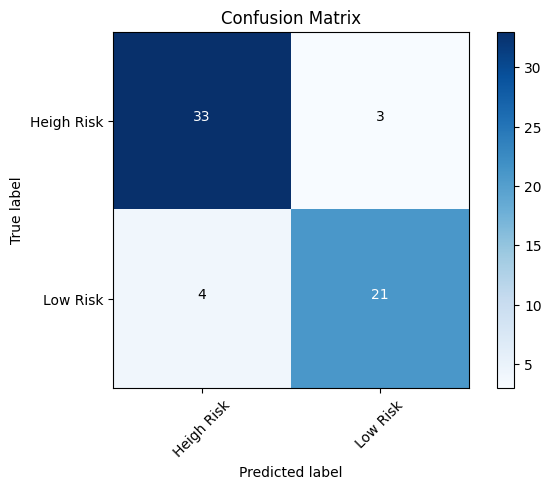

In [216]:
cnf_matrix = confusion_matrix(y_test, predicted_y, labels=[1, 0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Heigh Risk", "Low Risk"], normalize=False)

### Log Loss

In [217]:
from sklearn.metrics import log_loss

log_loss(y_test, predicted_y_probability)

0.3180128009648155

<hr>

## No Data Normalization

## Reading Data

In [218]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Separating Data

In [219]:
print(df.columns)

x_data = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp", "caa", "thall"]]
y_data = df["output"]

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


## Selecting Train & Test Data

In [220]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)

print(f"Train Data: x: {x_train.shape}, y: {y_train.shape}")
print(f"Test Data: x: {x_test.shape}, y: {y_test.shape}")

Train Data: x: (242, 13), y: (242,)
Test Data: x: (61, 13), y: (61,)


## Decision Tree

In [221]:
from sklearn.tree import DecisionTreeClassifier

heart_attack_tree = DecisionTreeClassifier(criterion="entropy")
heart_attack_tree.fit(x_train, y_train)

predicted_y = heart_attack_tree.predict(x_test)

print(f"Actual Data: {y_test.to_numpy()[0:5]}")
print(f"Predicted Data: {predicted_y[0:5]}")

Actual Data: [1 0 1 1 0]
Predicted Data: [0 1 1 1 1]


## Decision Tree Evaluation

### Jaccard

In [222]:
from sklearn.metrics import  jaccard_score
jaccard_score(predicted_y, y_test)

0.7804878048780488

### Accuracy Score

In [223]:
from sklearn.metrics import accuracy_score

predicted_y_train = heart_attack_tree.predict(x_train)
predicted_y_test = heart_attack_tree.predict(x_test)

print(f"Train Data Accuracy: {accuracy_score(y_train, predicted_y_train)}")
print(f"Test Data Accuracy: {accuracy_score(y_test, predicted_y_test)}")

Train Data Accuracy: 1.0
Test Data Accuracy: 0.8524590163934426


## Visualization

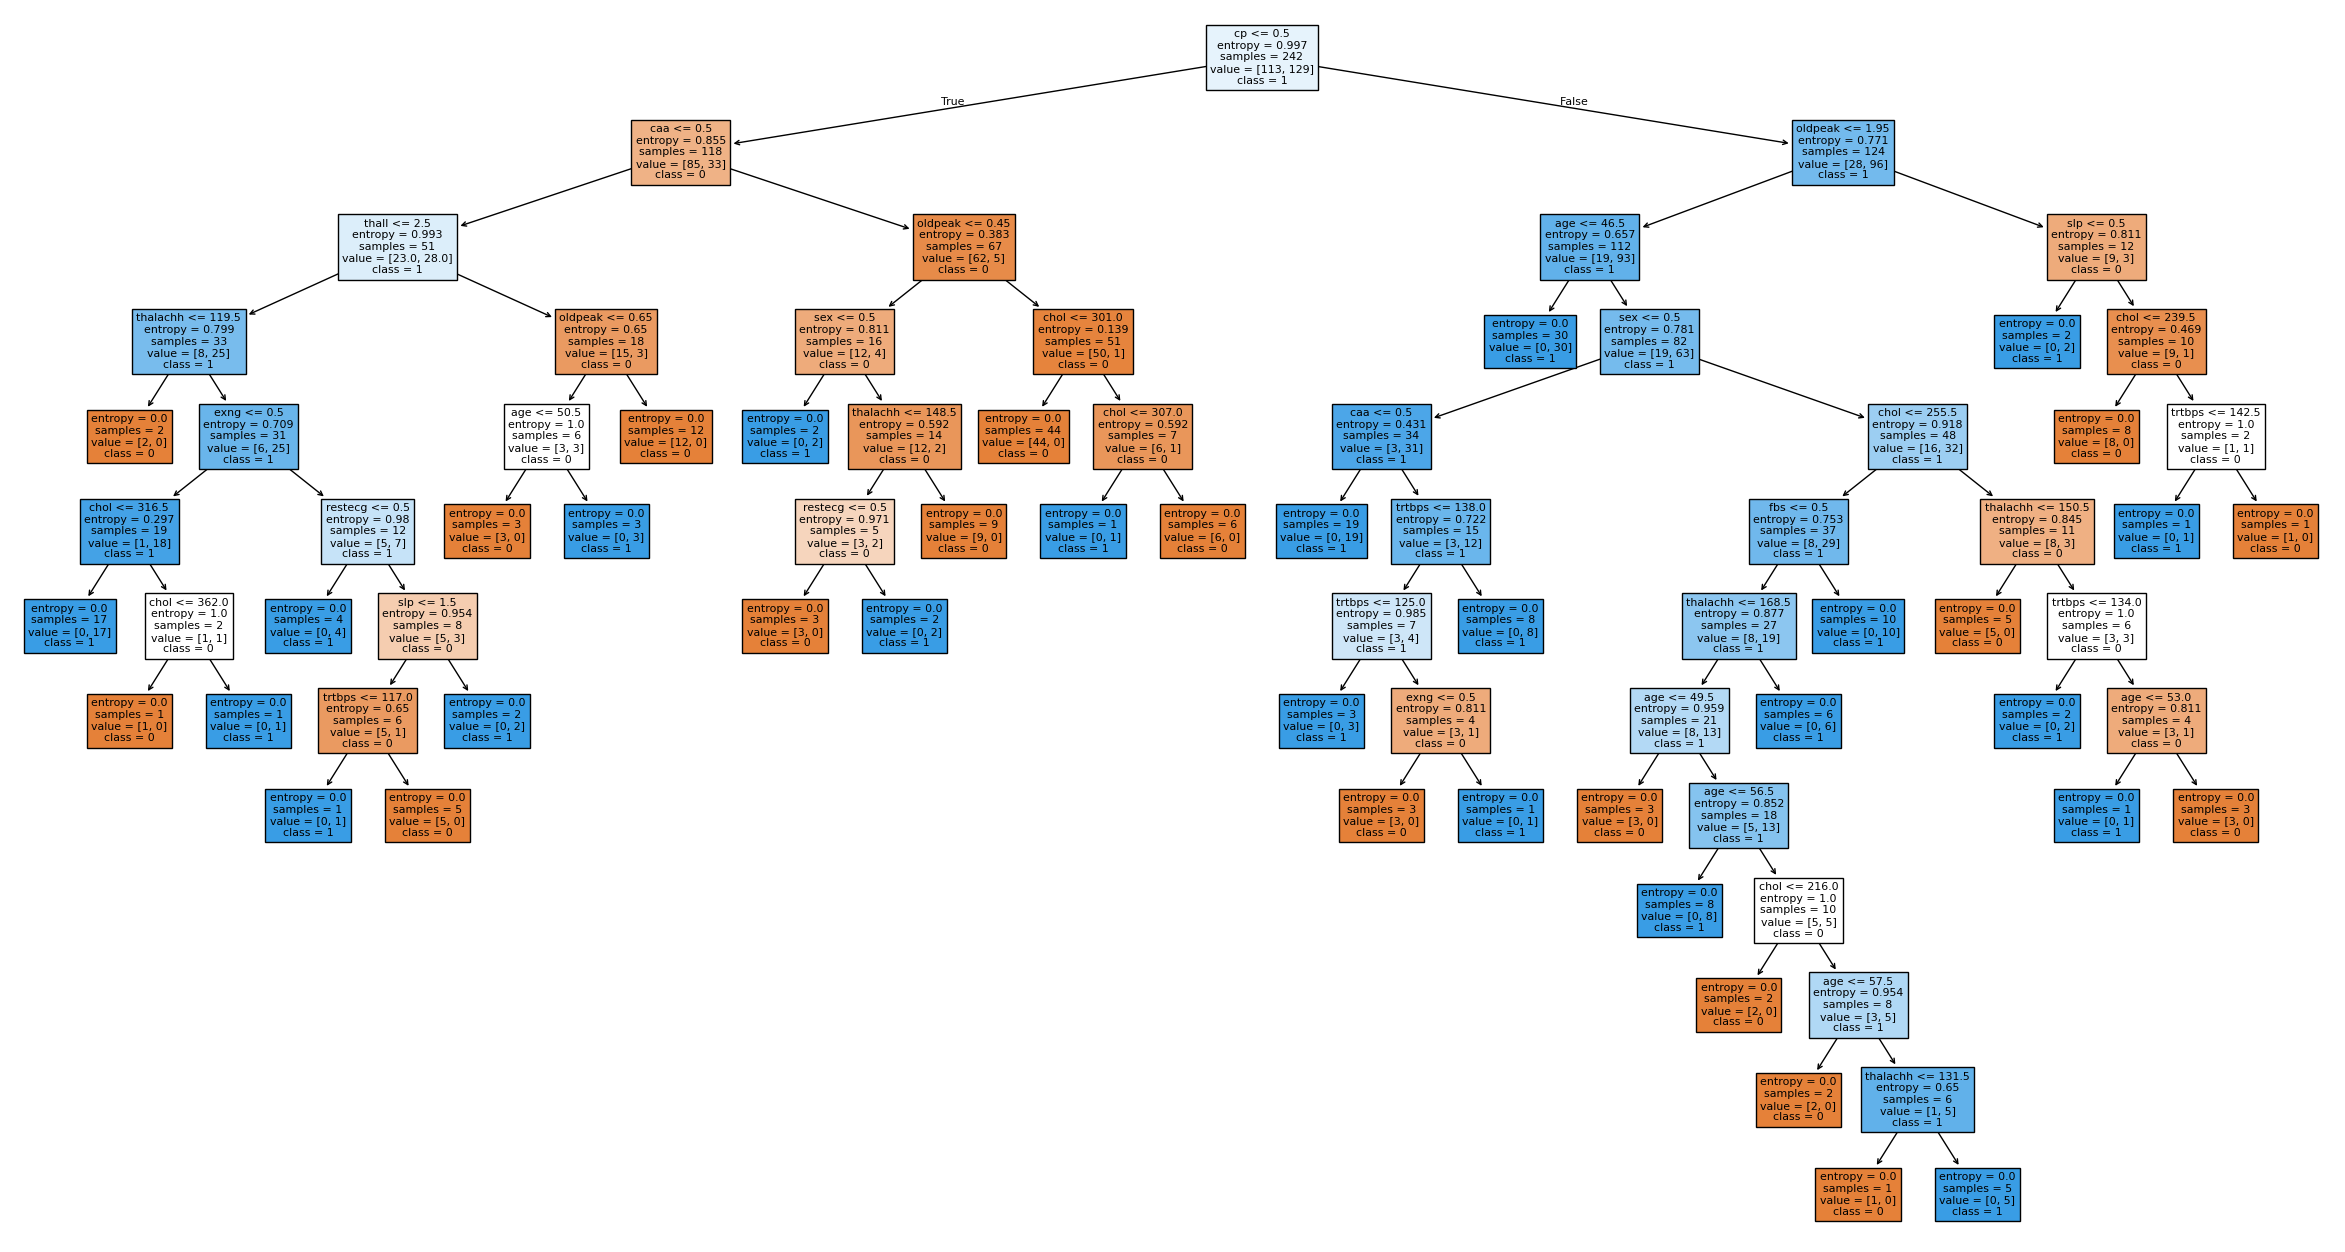

In [224]:
from sklearn import tree

plt.figure(figsize=(30, 16))
tree.plot_tree(heart_attack_tree, feature_names=df.columns[0:13], class_names=np.unique(y_train).astype(str), filled=True)

plt.show()